In [1]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%config InlineBackend.figure_format = 'retina'

# @title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact, fixed, HBox, Layout, VBox, interactive, Label, interact_manual
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")



with open('slice_data.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)


data = raw_data['PPC_RS']
n_column = data.iloc[0,:].size
starting_index = np.arange (1,n_column+1, 15)
cell_list = []

#separate the cells from one sheet

for i in starting_index:
    cell_data = data.iloc[:,i:i+13]
    cell_list.append(cell_data)


clamp_levels = data.iloc[0,1:14]
clamp_levels_string = pd.Series(clamp_levels, dtype="string")
col_list = list(clamp_levels_string)

In [2]:
def into_dict(data):
    n_column = data.iloc[0,:].size
    starting_index = np.arange (1,n_column+1, 15)

    cell_list = []
    clamp_levels = data.iloc[0,1:14]
    clamp_levels_string = pd.Series(clamp_levels, dtype="string")
    col_label = list(clamp_levels_string)


    #separate the cells from one sheet

    for i in starting_index:
        cell_data = data.iloc[:,i:i+13]
        cell_list.append(cell_data)

    num_neuron = len(cell_list)
    cell_id_list = []


    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)


    num_neuron = len(cell_list)
    cell_id_list = []
    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)
        sheet_time = data.iloc[1:,0]


    for i in range(num_neuron):
        cell_list[i].columns = col_label
        cell_list[i] = cell_list[i].iloc[1:,:]


    cell_dic = {}

    cell_dic['time'] = sheet_time
    cell_dic['data'] = cell_list
    cell_dic['cell_id'] =  cell_id_list

    return cell_dic

In [3]:
ppc_rs = into_dict(raw_data['PPC_RS'])
acc_rs = into_dict(raw_data['ACC_RS'])

acc_fs = into_dict(raw_data['ACC_FS'])
ppc_fs = into_dict(raw_data['PPC_FS'])


In [4]:
#compare the membrane potetials of ppc and pfc 


# bring the ppc data 


def overlap_mp(input_data, start, end, trial_num, point_idx):

    for i in range(trial_num):
        
        plt.plot(input_data['time'][start:end], input_data['data'][i]['-200.0'][start:end], 'c', alpha = 0.3, linewidth= 2)
        plt.plot(input_data['time'][start:end], input_data['data'][point_idx]['-200.0'][start:end], 'r', alpha = 0.7, linewidth= 2)
        
        
    plt.ylabel('memrane potential (mV)')
    plt.xlabel('time (ms)')
    plt.show()



In [5]:
# remove one item first and second, and third 

def remove_cell(data_set, remove_list):
    
    # sort the index based on order 
    
    remove_list.sort()
    
    num_deleted = 0
    
    for i in remove_list:
        i = i - num_deleted
        data_set['data'].pop(i)
        data_set['cell_id'].pop(i)
        num_deleted += 1
        print(num_deleted)
    
    return data_set
    
    
    

In [6]:
remove_list = [0, 5, 10]

In [7]:
_= remove_cell(acc_rs, remove_list)

1
2
3


In [8]:
len(acc_rs['data'])

13

In [25]:
acc_rs['cell_id']

['20180530 Slice 2_Cell 1',
 '20180620 Slice 1_Cell 2',
 '20180719 Slice 2_Cell 3',
 '20190419 Slice 2 Cell 0',
 '20190704 Slice 4_Cell 0',
 '20180719_Slice 1_Cell 1',
 '20180720 Slice 1_Cell 1',
 '20180720 Slice 2_Cell 0',
 '20180801 Slice 1_Cell 1',
 '20190704 Slice 3_Cell 0',
 '20190704 Slice 6_Cell 0',
 '20190830 Slice 1',
 '20190830 Slice 2']

In [9]:
def before_sweep(input_data, start, end):
    
    output = []
    cell_num = len(input_data['data'])
    

    for i in range(cell_num):
        
        output.append(input_data['data'][i]['-200.0'][start:end])
    
    return output

In [10]:
before_sweep = before_sweep(acc_rs, 0, 1000)

In [13]:
before_sweep[1]

1      -77.9419
2      -77.9419
3      -77.9419
4      -77.9724
5      -77.9419
         ...   
996    -77.0264
997    -77.0569
998    -77.0264
999    -77.0569
1000   -77.0569
Name: -200.0, Length: 1000, dtype: float64

In [15]:
# make a zero array 
import numpy

num_cell = len(before_sweep)
num_time = len(before_sweep[0])
rmp_mat = numpy.zeros([num_cell, num_time])




In [18]:
rmp_mat.shape

(13, 1000)

In [21]:
for i in range((num_cell)):
    rmp_mat[i,:] = before_sweep[i]
    
    

In [22]:
rmp_mean = numpy.mean(rmp_mat, axis=0)
rmp_sem = numpy.std(rmp_mat, axis=0)/numpy.sqrt(num_cell)

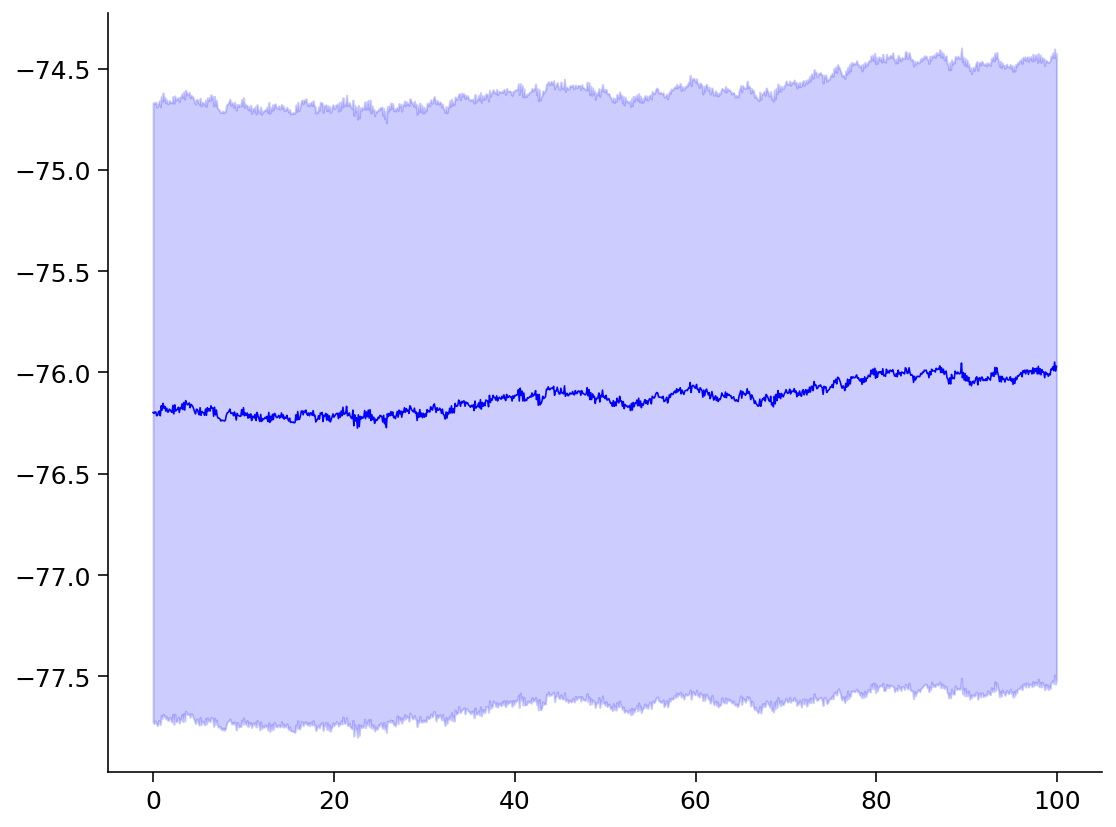

In [23]:
plt.plot(acc_rs['time'][:num_time], rmp_mean, 'b-', label='mean_1', linewidth=0.8)
plt.fill_between(acc_rs['time'][:num_time], rmp_mean - rmp_sem, rmp_mean + rmp_sem, color='b', alpha=0.2)
plt.show()

In [24]:
num_cell

13